**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Find IRF](#toc2_)    
- 3. [Figures](#toc3_)    
  - 3.1. [Sensitivity analysis wrt number of adjustment year](#toc3_1_)    
    - 3.1.1. [Effect on government](#toc3_1_1_)    
    - 3.1.2. [Effect on households](#toc3_1_2_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# Government spending shock - further comments

In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-v0_8-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = BabyMAKROModelClass(name='baseline') # create an instance of the model

In [3]:
par = model.par                 #set model parameters
ss = model.ss                   #create namespace for steady state
sol = model.sol                 #create namespace for solution

In [4]:
par.t_b = 0                     #set number of years before adjustment

In [5]:
parameter = 'delta_B'                                                       #set parameter
parvalues = [0,10,20]                                                       #set parameter values
ModelList = model.multi_model(parameter,parvalues, constant_wage = True)    #create a list of model. One for each value.

Jacobian calculated in 1.0 mins 5 secs
Jacobian calculated in 26.1 secs
Jacobian calculated in 26.3 secs


## 2. <a id='toc2_'></a>[Find IRF](#toc0_)

In [6]:
Tshock = 50                                                 #length of shock
persistence = 0.80**np.arange(Tshock)                       #persistence of shock

In [7]:
for i in range(len(ModelList)):
    ModelList[i].set_exo_ss()                                               #set steady state exogenous variables
    ModelList[i].set_unknowns_ss()                                          #set steady state unknown variables
                                      
    ModelList[i].sol.G[:Tshock] = ModelList[i].ss.G*(1 + 0.01*persistence)  #shock to government spending

    ModelList[i].find_IRF()                                                 #find impulse response functions

initial:
t1-t0 = 0.01396 secs
it = 3
    max. abs. error = 2.67e-12
    4.93e-14 in A_R_ini_error
    7.99e-15 in Aq_diff
    4.88e-15 in FOC_capital_agency
    2.90e-13 in FOC_K_ell
    2.67e-12 in mkt_clearing
    3.17e-14 in PC

solve: t1-t0 = 0.09175 secs
evaluate + update: t3-t2 = 0.06682 secs
initial:
t1-t0 = 0.01995 secs
it = 3
    max. abs. error = 2.98e-12
    9.29e-14 in A_R_ini_error
    1.42e-14 in Aq_diff
    6.88e-15 in FOC_capital_agency
    3.69e-13 in FOC_K_ell
    2.98e-12 in mkt_clearing
    3.35e-14 in PC

solve: t1-t0 = 0.08744 secs
evaluate + update: t3-t2 = 0.07183 secs
initial:
t1-t0 = 0.02394 secs
it = 3
    max. abs. error = 3.52e-12
    1.35e-13 in A_R_ini_error
    1.91e-14 in Aq_diff
    8.66e-15 in FOC_capital_agency
    4.70e-13 in FOC_K_ell
    3.52e-12 in mkt_clearing
    3.43e-14 in PC

solve: t1-t0 = 0.09808 secs
evaluate + update: t3-t2 = 0.06612 secs


## 3. <a id='toc3_'></a>[Figures](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Sensitivity analysis wrt number of adjustment year](#toc0_)

#### 3.1.1. <a id='toc3_1_1_'></a>[Effect on government](#toc0_)

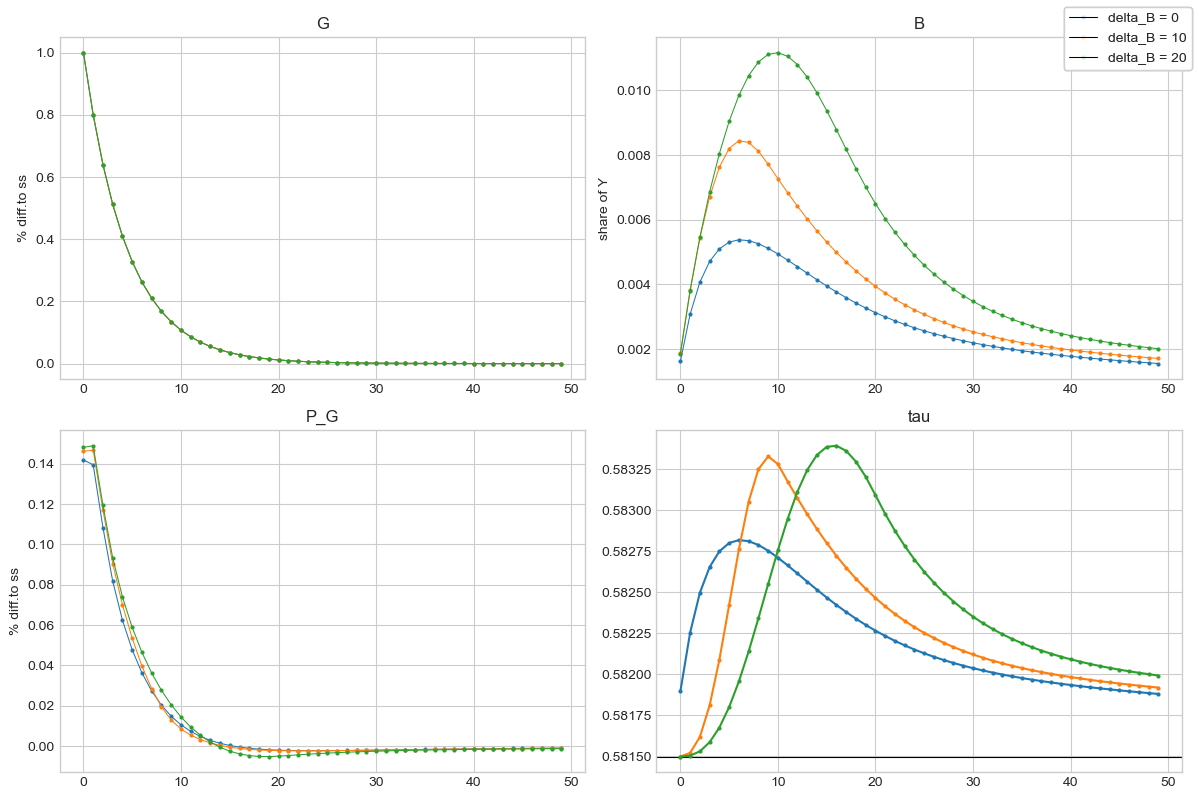

In [8]:
model.plot_IRF_models(ModelList,varlist=['G','B','P_G','tau'],abs=['tau'],Y_share=['B'], ncol=2,parameter=parameter,parvalues=parvalues)

#### 3.1.2. <a id='toc3_1_2_'></a>[Effect on households](#toc0_)

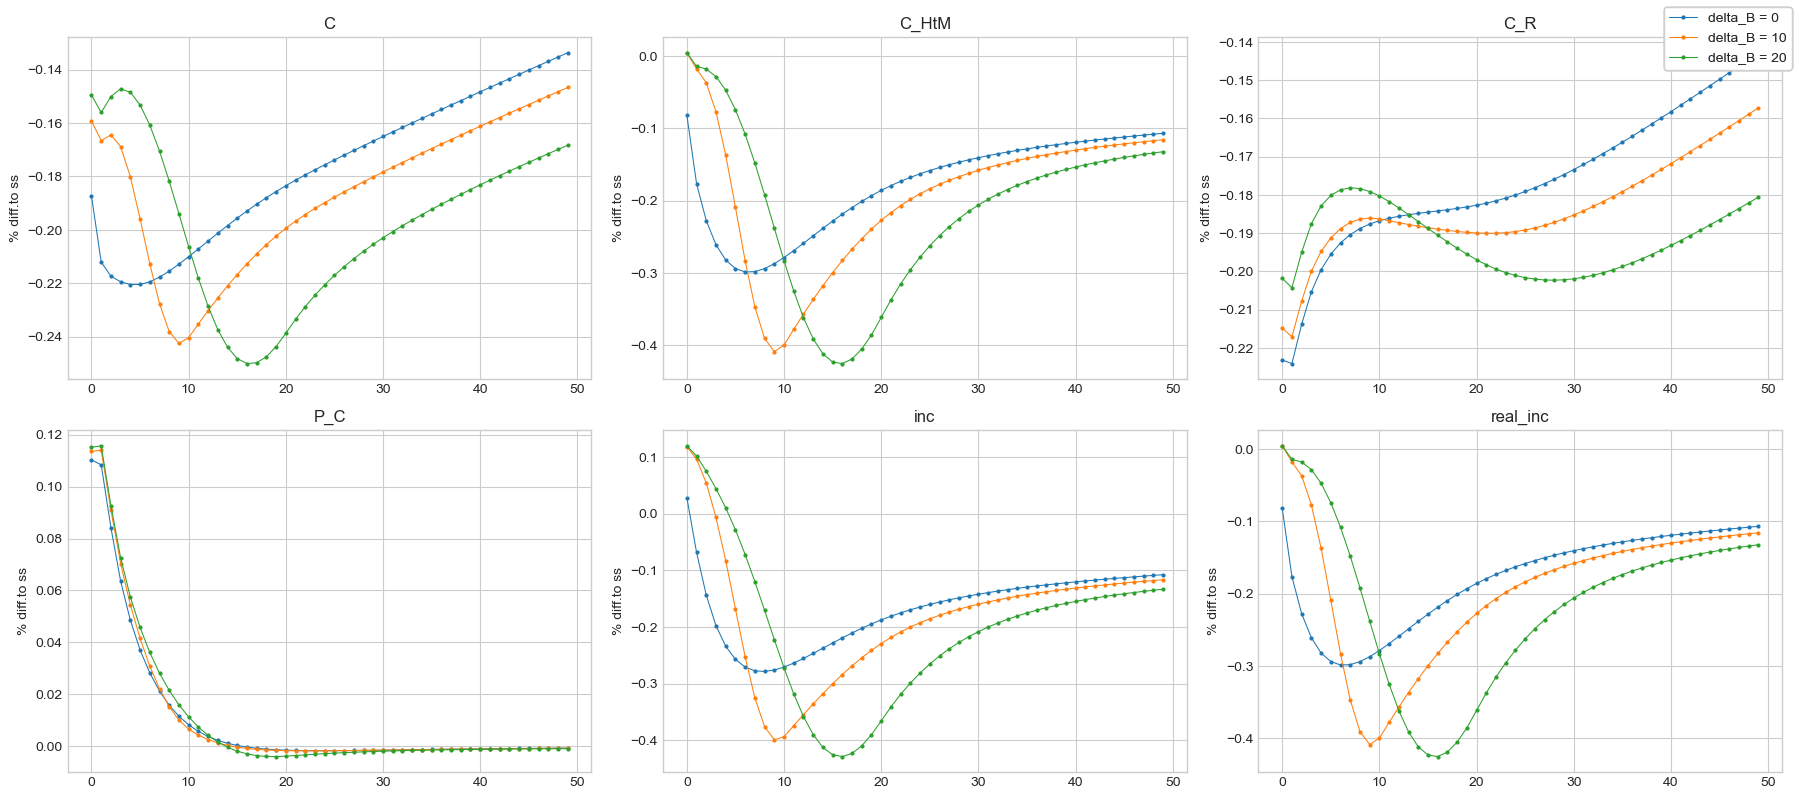

In [9]:
model.plot_IRF_models(ModelList,varlist=['C','C_HtM','C_R','P_C','inc','real_inc'],ncol=3,parameter=parameter,parvalues=parvalues)

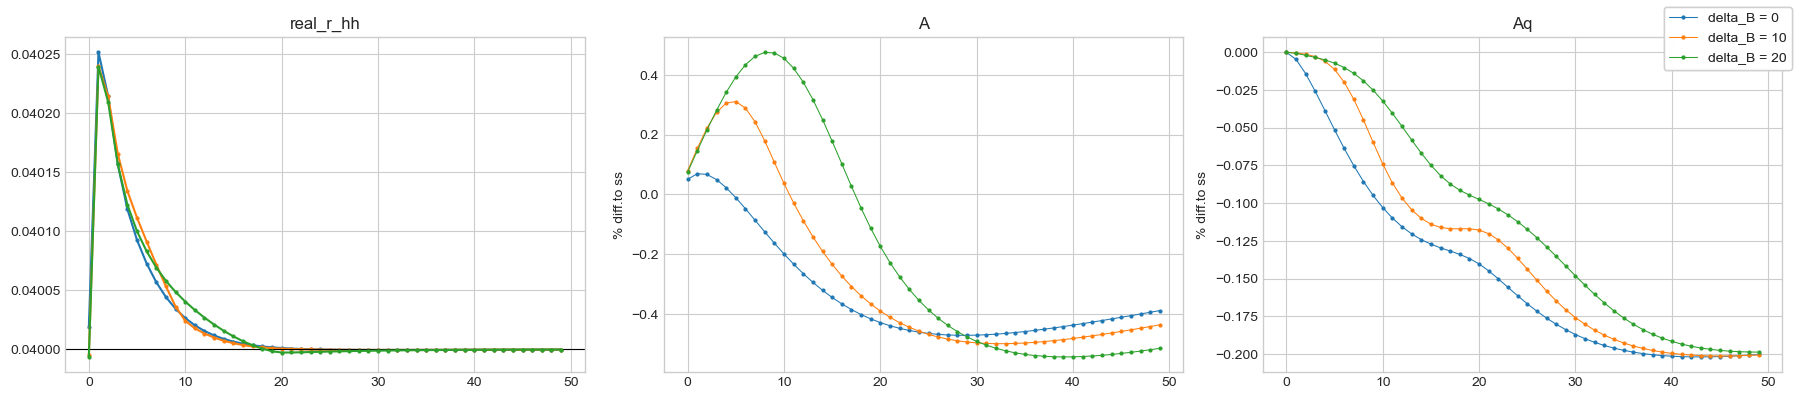

In [10]:
model.plot_IRF_models(ModelList,varlist=['real_r_hh','A','Aq'],ncol=3,abs=['real_r_hh'],parameter=parameter,parvalues=parvalues)